<a href="https://colab.research.google.com/github/rahul-727/ML/blob/main/2348544_Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
data = pd.read_csv('/content/employee_data (1) 2.csv')
data

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0
...,...,...,...,...,...,...,...,...,...,...
14244,178,IT,NaN,0.735865,5,NaN,low,0.263282,Employed,5.0
14245,257,sales,NaN,0.638604,3,NaN,low,0.868209,Employed,2.0
14246,232,finance,1.0,0.847623,5,NaN,medium,0.898917,Left,5.0
14247,130,IT,NaN,0.757184,4,NaN,medium,0.641304,Employed,3.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14249 entries, 0 to 14248
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14249 non-null  int64  
 1   department         13540 non-null  object 
 2   filed_complaint    2058 non-null   float64
 3   last_evaluation    12717 non-null  float64
 4   n_projects         14249 non-null  int64  
 5   recently_promoted  300 non-null    float64
 6   salary             14249 non-null  object 
 7   satisfaction       14068 non-null  float64
 8   status             14249 non-null  object 
 9   tenure             14068 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.1+ MB


In [4]:
data.shape

(14249, 10)

In [5]:
data.isnull().sum()

avg_monthly_hrs          0
department             709
filed_complaint      12191
last_evaluation       1532
n_projects               0
recently_promoted    13949
salary                   0
satisfaction           181
status                   0
tenure                 181
dtype: int64

In [7]:
data.nunique()

avg_monthly_hrs        249
department              12
filed_complaint          1
last_evaluation      12359
n_projects               7
recently_promoted        1
salary                   3
satisfaction         13710
status                   2
tenure                   8
dtype: int64

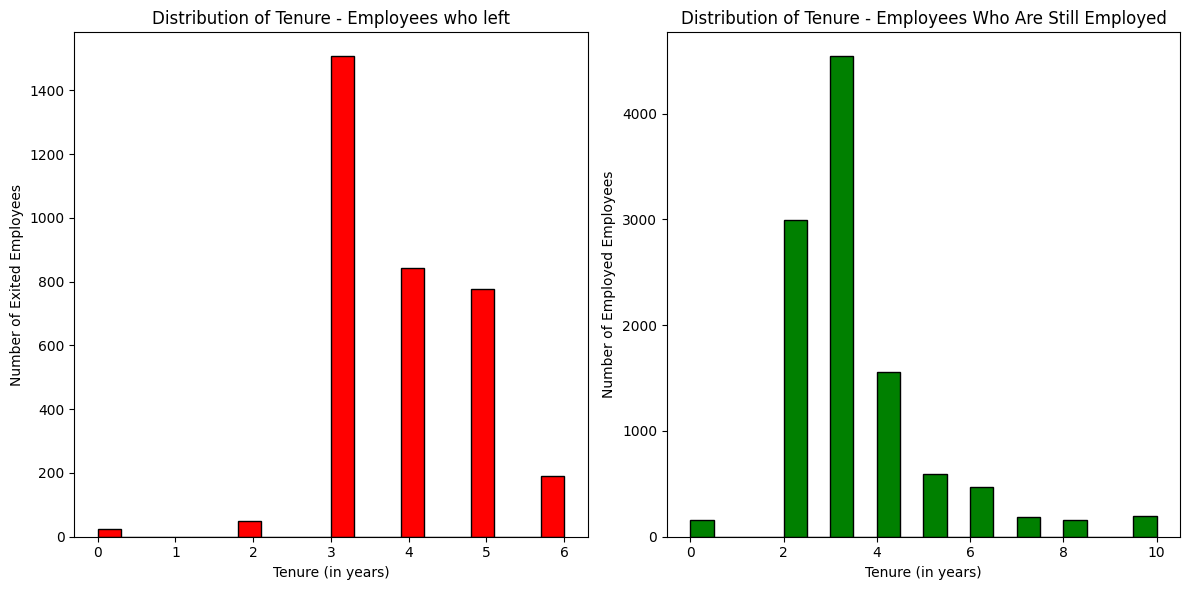

In [19]:
#visualize using histogram for employee tenure
data['tenure'] = data['tenure'].replace('NA', np.nan).fillna(0)
data['tenure'] = data['tenure'].astype(int)
left_employees = data[data['status']=='Left']
employed_employees = data[data['status']=='Employed']

plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.hist(left_employees['tenure'],bins=20,color='red',edgecolor='black')
plt.xlabel('Tenure (in years)')
plt.ylabel('Number of Exited Employees')
plt.title('Distribution of Tenure - Employees who left')

plt.subplot(1, 2, 2)
plt.hist(employed_employees['tenure'], bins=20, color='green', edgecolor='black')
plt.xlabel('Tenure (in years)')
plt.ylabel('Number of Employed Employees')
plt.title('Distribution of Tenure - Employees Who Are Still Employed')

plt.tight_layout()
plt.show()